# CSMODEL S16 MCO1

### Group 12 Members:
- ALBARRACIN, CLARISSA MAMUYAC
- CAPOTE, MARY GRACE SAN PEDRO
- RESURRECCION, ALJIRAH BRENDL YUTAN
- TAMSE, ANDREI GONZALES

The dataset used is [Salaries of Different Data Science Fields in the Data Science Domain](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data) and obtained from Kaggle that covers data science salaries from 2020 to 2023. It provides data such as work experience, employment type, job titles, and salaries. Our goal is to explore this dataset and gain insights using data modeling techniques.


Collection Process: Data has been sourced from aijobs.net in April 2023 in https://ai-jobs.net/salaries/  Checking the website, it is internally aggregated from the offered salaries in the job listing along with user reported salaries.
The most recent update is within the ai-jobs.net website, that includes 2024.

Possible Implications of Data Collection Method: The dataset focuses primarily on the United States' salaries in the Data Science domain. This factor may lead to inaccurate conclusions as not all countries are distributed properly. It is unclear whether or not the salaries shown are adjusted for inflation; potentially giving inaccurate salary amounts. Lastly, because the data collection includes self-reported salaries, there is a possibility of false reports, which could render some data invalid.

## Imported Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
from tabulate import tabulate
from scipy.stats import skew

## Read Dataset

In [3]:
ds_salary_df = pd.read_csv("ds_salaries.csv")
ds_salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
ds_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


1. All data types are correct.
2. There are no missing values (null values) present in the dataset.

# Dataset Columns and Descriptions

| Column Name        | Description                                                  |
|--------------------|--------------------------------------------------------------|
| work_year          | The year the salary was paid.                                |
| experience_level   | The experience level in the job during the year with possible values: EN (Entry-level / Junior), MI (Mid-level / Intermediate), SE (Senior-level / Expert), EX (Executive-level / Director). |
| employment_type    | The type of employment for the role with possible values: PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance). |
| job_title          | The role worked in during the year.                          |
| salary             | The total gross salary amount paid. No currency attached.    |
| salary_currency    | The currency of the salary paid as an ISO 4217 currency code.|
| salary_in_usd      | The salary in USD, calculated using statistical data from the BIS and central banks. |
| employee_residence | Employee's primary country of residence during the work year as an ISO 3166 country code. |
| remote_ratio       | The overall amount of work done remotely with possible values: 0 (No remote work), 50 (Partially remote/hybrid), 100 (Fully remote). |
| company_location   | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size       | The average number of people that worked for the company during the year with possible values: S (less than 50 employees), M (50 to 250 employees), L (more than 250 employees). |


In [5]:
observation_count, variables_count = ds_salary_df.shape

print("Number of observations:", observation_count)
print("Number of variables:", variables_count)

Number of observations: 3755
Number of variables: 11


## Dataset Cleaning

In [6]:
for column in ds_salary_df.columns:
    unique_values = ds_salary_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'work_year': [2023 2022 2020 2021]
Unique values in column 'experience_level': ['SE' 'MI' 'EN' 'EX']
Unique values in column 'employment_type': ['FT' 'CT' 'FL' 'PT']
Unique values in column 'job_title': ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'M

**Observation columns have unique values and are free from typos. But some job titles have inconsistencies, therefore it is subjected for cleaning.**

In [7]:
# Creating new clean dataset
ds_salary_clean = ds_salary_df

### Generalization of Job Titles

To reduce redundancy and standardize job titles, specific ranks such as "Principal" and "Staff" will be generalized. This is done to align with the existing categorization based on experience levels.

1. **Principal Machine Learning Engineer** ➔ Machine Learning Engineer
2. **Staff Data Analyst** ➔ Data Analyst
3. **Staff Data Scientist** ➔ Data Scientist
4. **Principal Data Architect** ➔ Data Architect
5. **Principal Data Engineer** ➔ Data Engineer
6. **Principal Data Analyst** ➔ Data Analyst
7. **Principal Data Scientist** ➔ Data Scientist


In [8]:
ds_salary_clean['job_title'] = ds_salary_df['job_title'].replace({
    'Principal Machine Learning Engineer': 'Machine Learning Engineer',
    'Staff Data Analyst': 'Data Analyst',
    'Staff Data Scientist': 'Data Scientist',
    'Principal Data Architect': 'Data Architect',
    'Principal Data Engineer': 'Data Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Scientist': 'Data Scientist'
})


### Cleaning Duplicated Job Titles

The dataset contains 93 job titles. The dataset's duplicated job listings are cleaned as follows:

1. **ML Engineer** ➔ Machine Learning Engineer (ML is shorthand for Machine Learning)
2. **BI Analyst** ➔  BI Data Analyst (BI = Business Intelligence)
3. **Machine Learning Software Engineer** ➔  Machine Learning Engineer
4. **Lead Data Scientist** ➔ Data Science Lead   

Job titles that appear similar but are not are the following:

1. Data Manager and Data Science Manager
2. BI (Business Intelligence) Data Analyst and Business Data Analyst.

In [9]:
ds_salary_clean['job_title'] = ds_salary_df['job_title'].replace({
    'ML Engineer': 'Machine Learning Engineer',
    'BI Analyst': 'BI Data Analyst',
    'Machine Learning Software Engineer': 'Machine Learning Engineer',
    'Lead Data Scientist': 'Data Science Lead'
})

### Cleaning Administrative Job Titles

For easier viewing, all administrative positions (e.g., manager, lead, consultant, director) are placed at the end of the job title.

1. **Director of Data Science** ➔ Data Science Director
2. **Head of Data** ➔ Data Head
3. **Head of Data Science** ➔ Data Science Head
4. **Head of Machine Learning** ➔ Machine Learning Head
5. **Lead Machine Learning Engineer** ➔ Machine Learning Engineer Lead
6. **Lead Data Analyst** ➔ Data Analyst Lead
7. **Lead Data Engineer** ➔ Data Engineer Lead

In [10]:
ds_salary_clean['job_title'] = ds_salary_df['job_title'].replace({
    'Director of Data Science': 'Data Science Director',
    'Head of Data': 'Data Head',
    'Head of Data Science': 'Data Science Head',
    'Head of Machine Learning': 'Machine Learning Head',
    'Lead Machine Learning Engineer': 'Machine Learning Engineer Lead',
    'Lead Data Analyst': 'Data Analyst Lead',
    'Lead Data Engineer': 'Data Engineer Lead'
})

## Dataset Preprocessing

### Dropping Unnecessary Variables

We have removed variables that are not required for our analysis.
These variables include:

1. **salary**
2. **salary_currency**
3. **employee_residence**

In [11]:
initial_columns = ds_salary_clean.columns.tolist()

# Drop the 'salary', 'salary_currency', and 'employee_residence' columns
ds_salary_clean.drop(columns=['salary', 'salary_currency', 'employee_residence'], inplace=True)

final_columns = ds_salary_clean.columns.tolist()

print("Columns before and after dropping 'salary' and 'salary_currency':")
print(tabulate([["Initial Columns", ", ".join(initial_columns)],
                ["Final Columns", ", ".join(final_columns)]],
               headers=["Stage", "Columns"], tablefmt="grid"))

Columns before and after dropping 'salary' and 'salary_currency':
+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Stage           | Columns                                                                                                                                                           |
+=================+===================================================================================================================================================================+
| Initial Columns | work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size |
+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Final Column

In [12]:
ds_salary_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   job_title         3755 non-null   object
 4   salary_in_usd     3755 non-null   int64 
 5   remote_ratio      3755 non-null   int64 
 6   company_location  3755 non-null   object
 7   company_size      3755 non-null   object
dtypes: int64(3), object(5)
memory usage: 234.8+ KB


In [13]:
ds_salary_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,85847,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,100,CA,M


## Exploratory Data Analysis

### Question 1  - What does the salary **(salary_in_usd)** distribution look like?

**Numerical Summaries:**

In [14]:
# Measures of Central Tendency
mean_salary = ds_salary_clean['salary_in_usd'].mean()
median_salary = ds_salary_clean['salary_in_usd'].median()
mode_salary = ds_salary_clean['salary_in_usd'].mode().values[0]  # In case of multiple modes, take the first one

print(f"Mean salary: ${mean_salary:,.2f}")
print(f"Median salary: ${median_salary:,.2f}")
print(f"Mode salary: ${mode_salary:,.2f}")

# Measures of Dispersion
salary_range = ds_salary_clean['salary_in_usd'].max() - ds_salary_clean['salary_in_usd'].min()
salary_variance = ds_salary_clean['salary_in_usd'].var()
salary_std = ds_salary_clean['salary_in_usd'].std()

print(f"Salary range: ${salary_range:,.2f}")
print(f"Salary variance: ${salary_variance:,.2f}")
print(f"Salary standard deviation: ${salary_std:,.2f}")

# Compute correlation matrix for selected numeric columns
numeric_columns = ['salary_in_usd']
numeric_df = ds_salary_clean[numeric_columns]



Mean salary: $137,570.39
Median salary: $135,000.00
Mode salary: $100,000.00
Salary range: $444,868.00
Salary variance: $3,976,011,879.23
Salary standard deviation: $63,055.63


**Central Tendency:** The mean salary of $137,570.39, median salary of $135,000.00, and mode salary of $100,000.00 indicate that salaries cluster around these values, highlighting typical salary levels in the dataset.

**Dispersion:** A wide salary range of $444,868.00, large variance of $3,976,011,879.23, and standard deviation of $63,055.63 illustrate significant variability in salary levels, reflecting diverse income ranges within the dataset.


**Visualization:**

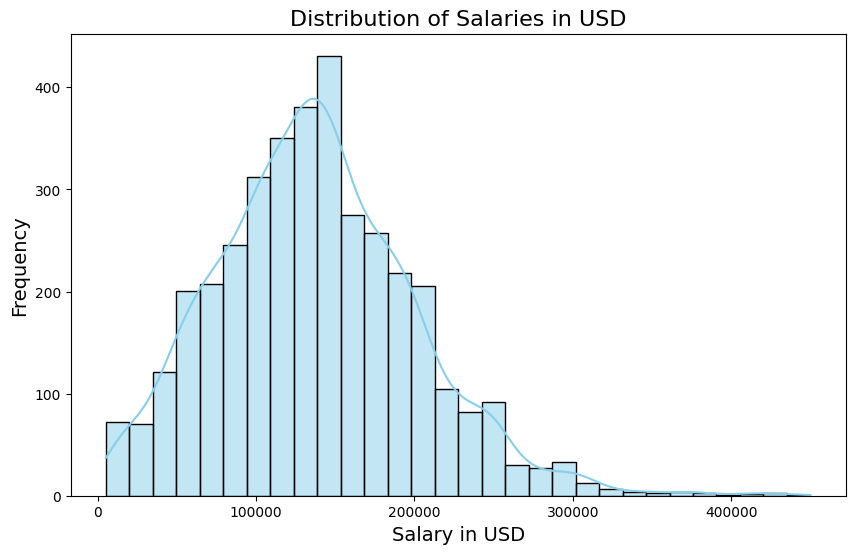

The skewness of the salary distribution is: 0.54


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(ds_salary_clean['salary_in_usd'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

# Skewness of salary_in_usd
salary_data = ds_salary_clean['salary_in_usd']
salary_skewness = skew(salary_data)

print(f"The skewness of the salary distribution is: {salary_skewness:.2f}")


The skewness of the salary distribution is 0.54, indicating a **moderately positively skewed distribution**.  Because of this skewness, some higher salaries have pulled the mean to the right, making the mean salary slightly higher than the median. For most data points, the median provides a better indication of the central tendency than the mode, which is likely lower. This indicates that while there are enough higher wages to produce a moderate positive skew, the majority of pay data points appear to be clustered around a central value.

### Question 2  - What are the most common company locations represented in the dataset?


**Numerical Summaries:**

In [16]:
most_common_location = ds_salary_clean['company_location'].mode()[0]
count_most_common_location = ds_salary_clean['company_location'].value_counts().max()

print("Most common company location:", most_common_location)
print("Count of the most common location:", count_most_common_location)

num_unique_locations = len(ds_salary_clean['company_location'].unique())
print("Number of unique company locations:", num_unique_locations)

company_location_counts = ds_salary_clean['company_location'].value_counts()
company_location_percentages = ds_salary_clean['company_location'].value_counts(normalize=True) * 100

print("\nCompany Location Counts:")
print(company_location_counts)
print("\nCompany Location Percentages:")
print(company_location_percentages)

Most common company location: US
Count of the most common location: 3040
Number of unique company locations: 72

Company Location Counts:
company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

Company Location Percentages:
company_location
US    80.958722
GB     4.580559
CA     2.316911
ES     2.050599
IN     1.544607
        ...    
MK     0.026631
BS     0.026631
IR     0.026631
CR     0.026631
MT     0.026631
Name: proportion, Length: 72, dtype: float64


**Visualization:**

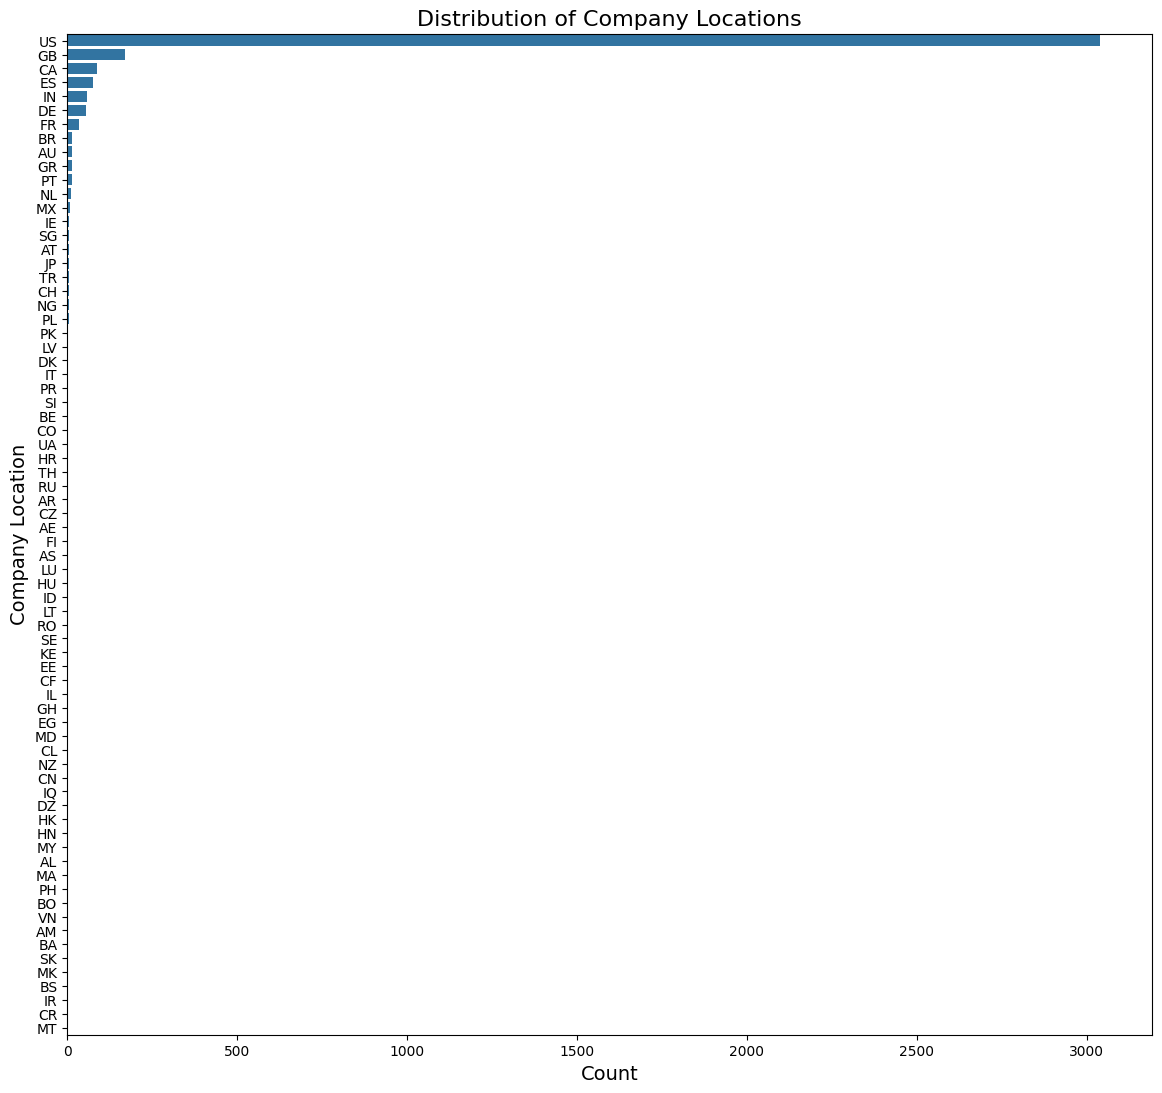

In [17]:
plt.figure(figsize=(14, 13))
sns.countplot(y='company_location', data=ds_salary_clean, order=ds_salary_clean['company_location'].value_counts().index)
plt.title('Distribution of Company Locations', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Company Location', fontsize=14)
plt.show()

The analysis of the **company_location** variable indicates a **bias** towards  the United States market, which hosts the majority of companies in the dataset (3040 out of 3755 observations, or approximately 80.96%). This bias suggests that the dataset may not fully represent global diversity in company locations and could skew insights towards regions with higher data availability or participation.

### Question 3: What are the most common job titles found in the dataset?

**Numerical Summaries:**

In [35]:
most_common_title = ds_salary_clean['job_title'].mode()[0]
count_most_common_title = ds_salary_clean['job_title'].value_counts().max()

print("Most common job title:", most_common_title)
print("Count of the most common job title:", count_most_common_title)

num_unique_titles = len(ds_salary_clean['job_title'].unique())
print("Number of unique job titles:", num_unique_titles)

job_title_counts = ds_salary_clean['job_title'].value_counts()
job_title_percentages = ds_salary_clean['job_title'].value_counts(normalize=True) * 100

print("\nJob Title Counts:")
print(job_title_counts)
print("\nJob Title Percentages:")
print(job_title_percentages)

Most common job title: Data Engineer
Count of the most common job title: 1042
Number of unique job titles: 82

Job Title Counts:
job_title
Data Engineer                 1042
Data Scientist                 849
Data Analyst                   615
Machine Learning Engineer      334
Analytics Engineer             103
                              ... 
Data Management Specialist       1
Deep Learning Researcher         1
Manager Data Management          1
Azure Data Engineer              1
Finance Data Analyst             1
Name: count, Length: 82, dtype: int64

Job Title Percentages:
job_title
Data Engineer                 27.749667
Data Scientist                22.609854
Data Analyst                  16.378162
Machine Learning Engineer      8.894807
Analytics Engineer             2.743009
                                ...    
Data Management Specialist     0.026631
Deep Learning Researcher       0.026631
Manager Data Management        0.026631
Azure Data Engineer            0.026631
Fina

**Visualization:**

Text(0.5, 1.0, 'Top 20 Job Titles')

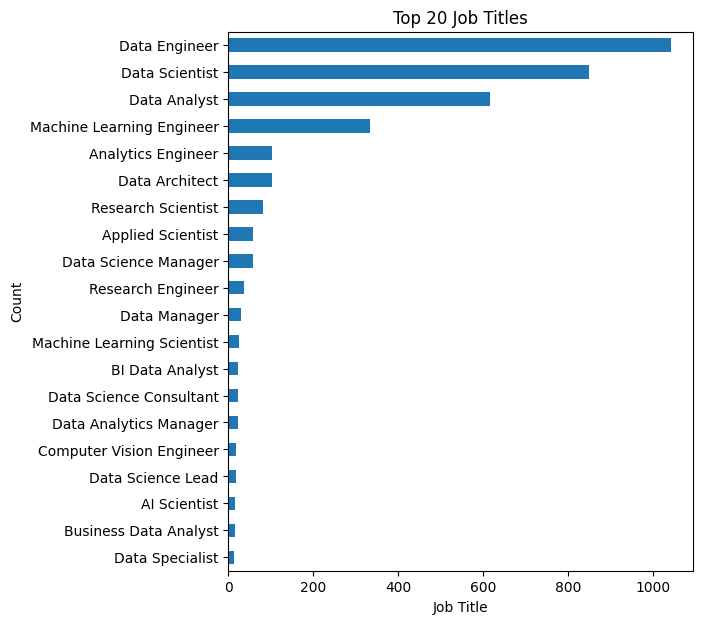

In [36]:
top20_job_title_count_df = job_title_counts.head(20)
top20_job_title_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 20 Job Titles')

Analysis on the job_title variable shows that the three job titles with the most observations are Data Engineer, Data Scientist, and Data Analyst respectively. Visualizations are also limited to show only the top 20 job titles present due to the large number of unique job titles (82 unique job titles). Due to numerous job titles being underrepresented, the dataset may not properly show the full spectrum of roles within the Data Science field.

### Question 4  - Is there a correlation between salary and experience level?

**Numerical Summaries:**

In [21]:
# Group data by 'experience_level' and calculate summary statistics
summary_stats = ds_salary_clean.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

                           mean    median           std    min     max
experience_level                                                      
EN                 78546.284375   70000.0  52225.424309   5409  300000
EX                194930.929825  196000.0  70661.929661  15000  416000
MI                104525.939130  100000.0  54387.685128   5132  450000
SE                153051.071542  146000.0  56896.263954   8000  423834


* **EN (Entry-level / Junior):**
    * Mean: $78,546.28
    * Median: $70,000.00
    * Std: $52,225.42
    * Min: $5,409
    * Max: $300,000
* **EX (Executive-level / Director):**
    * Mean: $194,930.93
    * Median: $196,000.00
    * Std: $70,661.93
    * Min: $15,000
    * Max: $416,000
* **MI (Mid-level / Intermediate):**
    * Mean: $104,525.94
    * Median: $100,000.00
    * Std: $54,387.69
    * Min: $5,132
    * Max: $450,000
* **SE (Senior-level / Expert):**
    * Mean: $153,051.07
    * Median: $146,000.00
    * Std: $56,896.26
    * Min: $8,000
    * Max: $423,834

**Visualization:**

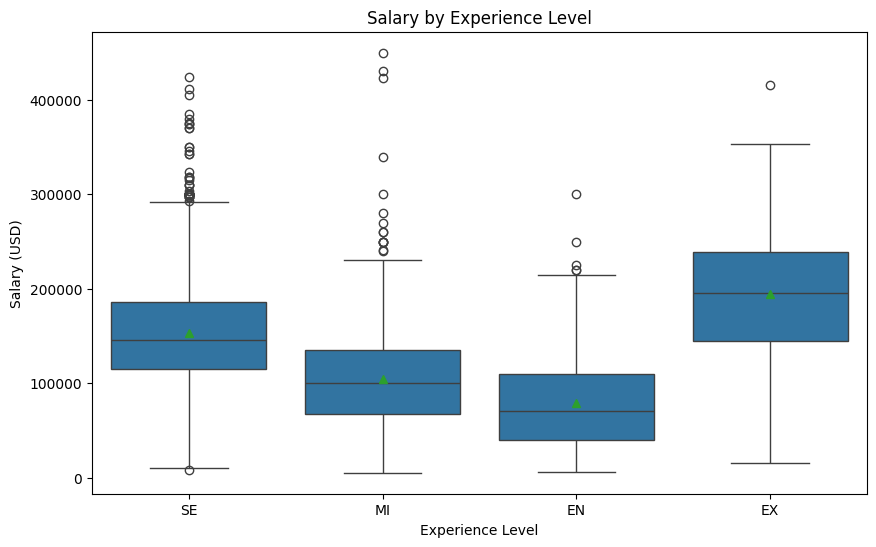

In [22]:
# Salary vs. Experience Level
plt.figure(figsize=(10,6))
sns.boxplot(
    x = "experience_level",
    y = "salary_in_usd",
    showmeans=True,
    data=ds_salary_clean
)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary by Experience Level')
plt.show()

Based on the trend observed from the box plot suggests that as the **experience level** increases, so does the the **salary** and the range of potential salaries. Implicating that there is a positive correlation between the two variables.

### Question 5 - How does the type of employment affect salary distribution, and which employment type exhibits the greatest salary variability?

**Numerical Summaries:**

In [23]:
# Group data by 'employment_type' and calculate summary statistics
summary_stats = ds_salary_clean.groupby('employment_type')['salary_in_usd'].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

                          mean    median            std    min     max
employment_type                                                       
CT               113446.900000   75000.0  130176.746842   7500  416000
FL                51807.800000   50000.0   29458.879336  12000  100000
FT               138314.199570  135000.0   62452.177613   5132  450000
PT                39533.705882   21669.0   38312.145181   5409  125404


**Visualization:**

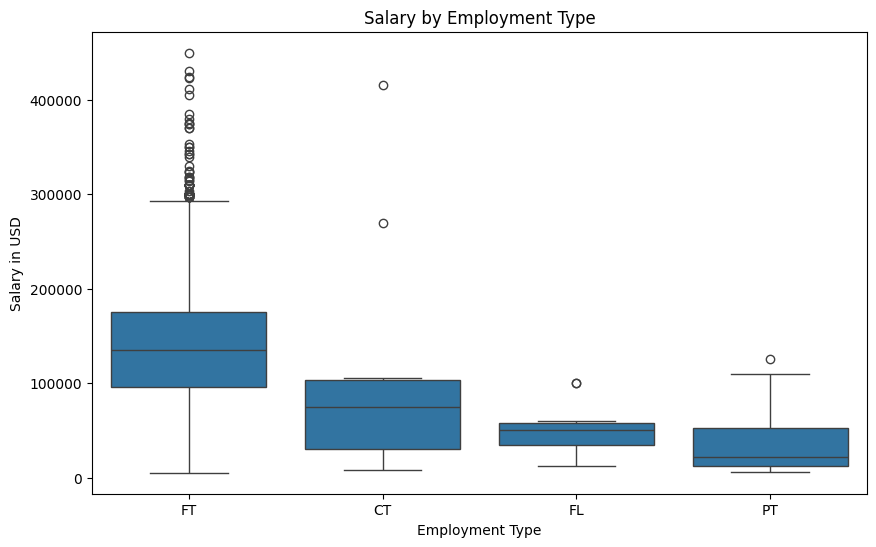

In [24]:
# Box Plot for salary and employment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=ds_salary_clean, x='employment_type', y='salary_in_usd')

plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

This box plot analysis aims to compare the **salary** ranges from different **employment types**, suggesting that there is a difference in financial growth potential for each category.

* **Contract (CT):** Shows a high mean salary but also a large standard deviation, indicating a wide range of salaries. The maximum salary is substantial, suggesting good growth potential for high-skilled positions.

* **Consulting (CL):** Has a lower mean salary compared to CT, with less variability. The growth potential may be moderate, with salaries mostly clustered around the median.

* **Freelance (FL):** Exhibits the highest mean salary and maximum salary, indicating excellent growth potential, especially for top performers in their field.

* **Part-Time (PT):** Has the lowest mean and maximum salaries, reflecting limited growth potential, likely due to fewer hours worked.

## Research Question

### Extra Visuals (EXCLUDE IF NOT INCLUDED IN EDA)

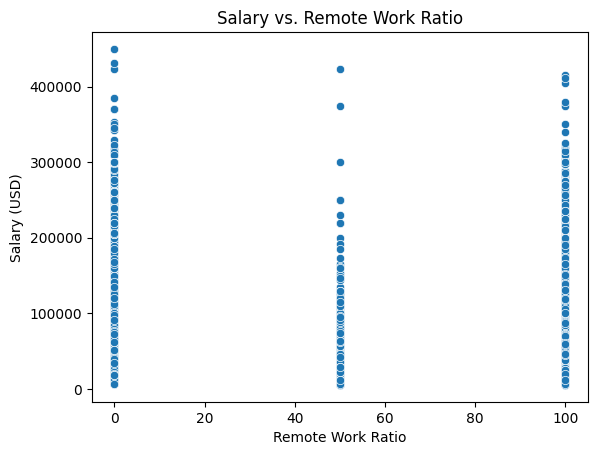

In [25]:
# Salary and Remote Work
sns.scatterplot(
    x = "remote_ratio",
    y = "salary_in_usd",
    data=ds_salary_clean
)
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary (USD)')
plt.title('Salary vs. Remote Work Ratio')
plt.show()

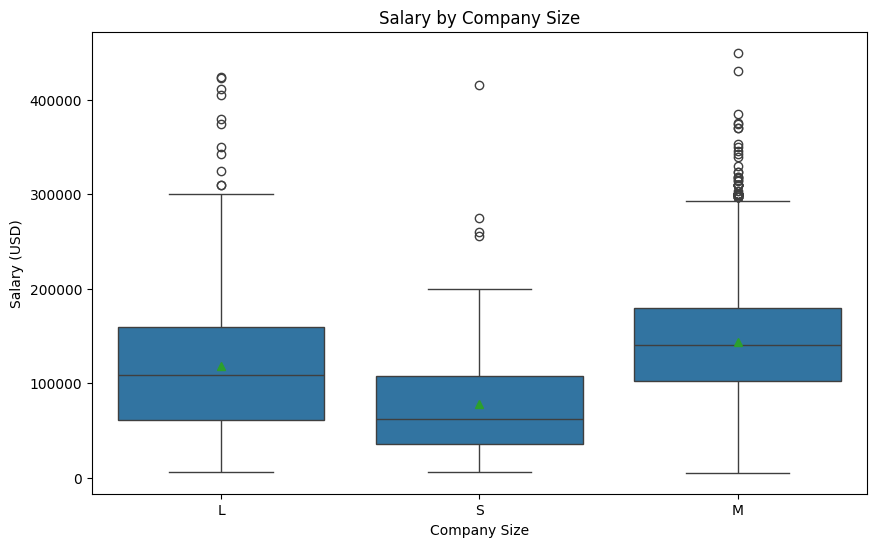

In [26]:
# Company Analysis - Grouped boxplots
plt.figure(figsize=(10,6))
sns.boxplot(
    x = "company_size",
    y = "salary_in_usd",
    showmeans=True,
    data=ds_salary_clean
)
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Salary by Company Size')
plt.show()


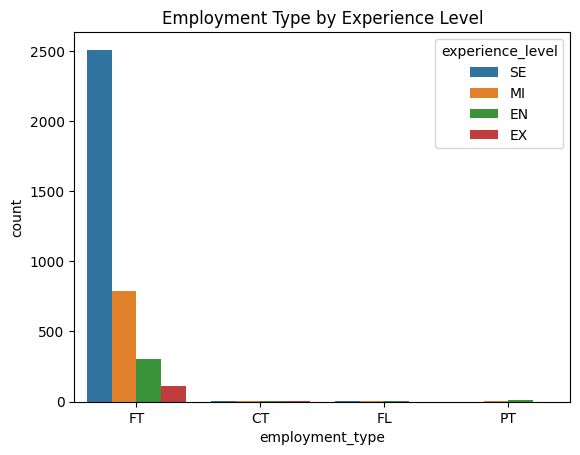

In [27]:
sns.countplot(x='employment_type', hue='experience_level', data=ds_salary_clean)
plt.title('Employment Type by Experience Level')
plt.show()

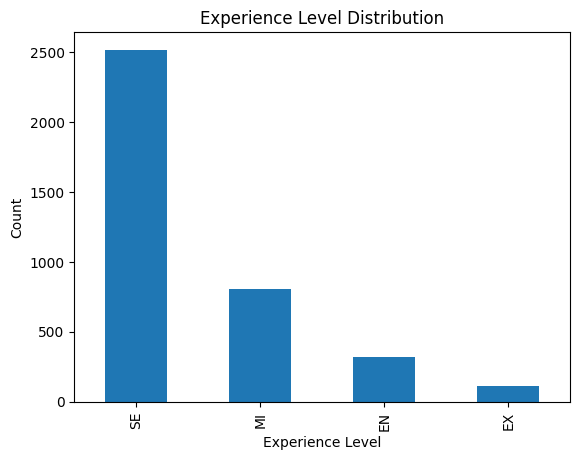

In [28]:
ds_salary_clean['experience_level'].value_counts().plot(kind='bar')
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

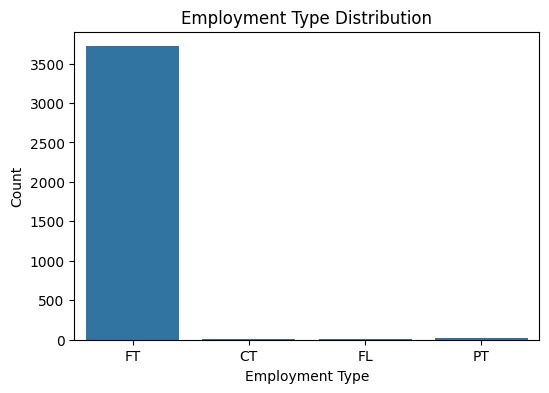

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='employment_type', data=ds_salary_clean)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')
plt.show()